01. Plot of the liquid level

Total number of frames in the video: 240 

Threshold Value: 0.0
Max Contour Area for frame 0 : 6.0
Total Area for frame 0 : 25920
Percentage : 0.0 %
Time : 0.0 s 

Threshold Value: 0.0
Max Contour Area for frame 1 : 229.0
Total Area for frame 1 : 25920
Percentage : 0.9 %
Time : 0.1 s 

Threshold Value: 0.0
Max Contour Area for frame 2 : 468.5
Total Area for frame 2 : 25920
Percentage : 1.8 %
Time : 0.2 s 

Threshold Value: 0.0
Max Contour Area for frame 3 : 491.0
Total Area for frame 3 : 25920
Percentage : 1.9 %
Time : 0.3 s 

Threshold Value: 1.0
Max Contour Area for frame 4 : 355.5
Total Area for frame 4 : 25920
Percentage : 1.4 %
Time : 0.4 s 

Threshold Value: 1.0
Max Contour Area for frame 5 : 317.5
Total Area for frame 5 : 25920
Percentage : 1.2 %
Time : 0.5 s 

Threshold Value: 1.0
Max Contour Area for frame 6 : 377.5
Total Area for frame 6 : 25920
Percentage : 1.5 %
Time : 0.6 s 

Threshold Value: 1.0
Max Contour Area for frame 7 : 333.0
Total Area for frame 7 : 25920
Percentag

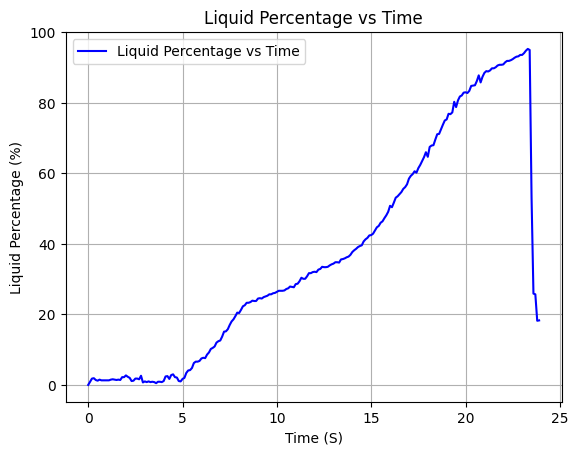

In [1]:
import cv2
import matplotlib.pyplot as plt

#create arrays for save x and y coordinates
x_coords =[]
y_coords =[]

# Open the video file
cap = cv2.VideoCapture("Data/liquidVideo.mp4")

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# check the Frames per second 
fps = cap.get(cv2.CAP_PROP_FPS)

# Get the total number of frames
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total number of frames in the video: {frame_count}", '\n')

# Extract and plot frames using frame_count
for count in range(frame_count):
    flag, frame = cap.read()
    if not flag:
        print(f"Stopped reading at frame {count}.")
        break

    # Convert the frame to grayscale (if needed for visualization)
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Upload the frame 00
    img_b = cv2.imread('Data/liquidVideo_0.jpg', 0)

    # Subtracting the images
    img_sub = cv2.subtract(img_b, frame_gray)

    # Thresholding the image, to obtain binary image
    ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Print the used threshold value
    print('Threshold Value:', ret)

    # Find contours in the image
    contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Sort the contours by size in descending order
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
    # Print the max contour area
    print('Max Contour', f"Area for frame {count} :", cv2.contourArea(contours[0]))

    # Find the area of the whole image
    rows, cols = img_sub_thresh.shape
    total_area = rows * cols
    print(f"Total Area for frame {count} :", total_area)

    # Calculate the percentage of the largest contour area, rounded to 1 decimal point
    percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
    print('Percentage :', percentage, '%')

    # Display the filling time
    time = count/fps
    print('Time :', time, 's', '\n')

    # Prepare the coordinates for plot 
    x_coords.append(time)
    y_coords.append(percentage)

# Display the splitted frame count
print(f"Displayed {count+1} frames from the video.")

# Plot the points
plt.plot(x_coords, y_coords, color='blue', label='Liquid Percentage vs Time')
plt.xlabel("Time (S)")
plt.ylabel("Liquid Percentage (%)")
plt.title("Liquid Percentage vs Time")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

cap.release()
cv2.destroyAllWindows()



02. A brief note on what the student understood by reading the section on Otsu's threholding method.

Otsu's method refers to a procedure for automatically determining the optimal threshold value to convert a grayscale image into a black-and-white image (binary image). Instead of manually choosing a threshold value, Otsu's method calculates it for us.
The idea is essentially to divide the image into two regions: background (darker areas) and foreground (lighter areas). Otsu's method simply analyzes the histogram of pixel intensity in order to find a value that best separates both groups by minimizing the overlap or confusion between them.
In OpenCV, the application of Otsu's method is made using the function cv2.threshold() with the flag cv2.THRESH_OTSU. 

Example:

In [ ]:
_, thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

Here, we don’t need to set the threshold value (0 is just a placeholder), as Otsu’s method automatically calculates it.
It works well for images where the background and object are clearly distinguishable (bimodal histograms). If the image is noisy or has uneven lighting, applying a blur (like Gaussian blur) before using Otsu’s method can improve the results.

03. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.

In Frame 238, bright reflections and uneven lighting at the upper part of the container cause Otsu’s method to incorrectly segment some non-liquid regions as part of the liquid. 
In Frame 239, surface ripples and the textured bottom of the container introduce additional intensity variations, leading to an overestimation of the liquid level.

![Frame 238](Data/frame238.png)
![Frame 239](Data/frame239.png)


Frame 238
Threshold Value: 97.0
Max Contour Area: 4729.5
Total Area: 25920
Percentage: 18.2 %

Frame 239
Threshold Value: 97.0
Max Contour Area: 4733.0
Total Area: 25920
Percentage: 18.3 %

04. A brief description on the final algorithm developed by the student.

The developed algorithm analyzes liquid levels in the video sequence by utilizing image processing techniques. It starts by reading the video and extracting each frame, which is then converted to grayscale for easier processing. The first frame serves as the background reference, and subsequent frames are compared to this background using background subtraction. This process isolates the changes in the liquid level, which are crucial for tracking the filling process.
The difference image obtained from background subtraction is then thresholded using Otsu's method, which converts the image into a binary format where liquid regions are highlighted. Contours of the binary image are detected, and the largest contour is assumed to represent the liquid area. The algorithm calculates the area of this largest contour and divides it by the total area of the frame to compute the liquid percentage.
For each frame, the liquid percentage and the corresponding time are stored and plotted on a graph, showing the liquid level variation over time. The x-axis represents time (in seconds), while the y-axis represents the liquid percentage. 